# Developing Optimisers in Python
## Coursework Assignment

- The stochastic algorithm I used for Task 3 was Simulated Annealing
- When compared to other implementations, such as genetic algorithms, simmulated annealing seemed simplest implementation for this problem 
- All constraints were applied for both optimisers. This was done to reduce the decision space.
- From analysis, because simmulated annealing has a more consistently lower solution, it can be assumed that simmulated annealing is better for this particular function.

In [90]:
import random as random
import numpy as np
import math as m
import matplotlib.pyplot as plt

### Task 1: 

In [91]:
def f(x):
    
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    
    return ((x1**2)*x2*(2+x3))



In [92]:
def g1(x):
    
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    
    return(1- ((x2**3)*x3) / (71785*(x1**4)))

In [93]:
def g2(x):  
    
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    
    return (((4*x2**2)-(x1*x2))/(12566*(x2*x1**3 - x1**4))) + (1/(5108*(x1**2))) - 1

In [94]:
def g3(x):
    
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    
    return(1-((140.45*x1)/((x2**2)*x3)))

In [95]:
def g4(x):
    
    x1 = x[0]
    x2 = x[1]
    
    return ((x1+x2/1.5)-1)

### Task 2

In [96]:
# initialising and bounding values to the array x
boundary = np.array([[0.05,2],[0.25,1.3],[2,15]])
x = np.array([boundary[i][0] + random.random()*(boundary[i][1]-boundary[i][0])for i in range(len(boundary))])

In [97]:
# method to calculate static penalty for any given function and constrainst: 
def s(x,constraint_funcs,r=20,beta=1):
    return r*np.max([0,constraint_funcs(x)])**beta


# method to apply the static penalty to any function and constraint   
def phi_static(x,function,constraint_sum):
    return f(x) + constraint_sum

In [98]:
# Random Search Algorithm applied to function f
def RS(x,function,iterations):
    
    # start with any large number
    best_solution = 999999999999999
    
    # initialise an empty array for three x variables; 
    best_x = [None]*3
    
    for i in range(iterations):
        
        # produce a random set of x values for each iteration
        new_x = [boundary[i][0] + random.random()*(boundary[i][1]-boundary[i][0])for i in range(len(boundary))]
        
        # calculate the static penalty of function at current iteration
        constraints = s(new_x,g1) + s(new_x,g2) + s(new_x,g3) + s(new_x,g4)
        
        # apply static penalty to each constraint to get new solution
        new_solution = phi_static(new_x,function,constraints)

        # update current solution if new solution is better
        if(new_solution < best_solution):
            best_solution = new_solution 
            best_x = new_x

    return best_x,best_solution        

In [99]:
print(RS(x,f,3000))

([0.05604094045137571, 0.4493467136705989, 9.973004788050446], 0.01689645342614435)


### Task 3

In [100]:
# T function (Local-search transition distribution)
def T (x,boundary):
    
    #produce a 1d array of variances of the x dimensions
    variance = np.array([boundary[0][1]-boundary[0][0],
                         boundary[1][1]-boundary[1][0],
                         boundary[2][1]-boundary[2][0]])
    
    #get the standard deviation for which we bind 10% of its distribution value i.e deviation[i] = (bi - ai) x 0.1
    standard_deviation = variance * 0.1
    
    #we then transpose and diagonalise the deviations to get:
    #[d00]
    #[0d0]
    #[00d]
    # where d is the deviation
    covariance = np.diag(standard_deviation)
    
    return np.random.multivariate_normal(x,covariance)


#simple helper function to ensure x dimension remain in boundary.
def bound(x,boundary):
    for i in range(len(x)):
        if(x[i]>boundary[i][1]):
            x[i]=boundary[i][1]
        if(x[i]<boundary[i][0]):
            x[i]=boundary[i][0]
    return x
    

In [101]:
# Simulated Annealing Optimisation applied to function f
def SA(x,function,iterations,temperature):
    
    # create array of all the upperbounds and lowerbounds 
    Tmin = [boundary[b][0] for b in range(len(x))]
    Tmax = [boundary[b][1] for b in range(len(x))]
    
    # select a random initial x value and find it's resulting y value
    best_x = x
    best_solution = f(best_x)
    
    #initially set the centering X to the current best x
    xCenter = best_x
    
    #set the centering y to be the applied function of best x
    yCenter = best_solution
    
    #apply constraints:
    constraints = 0 
    constraints = s(best_x,g1,r=10) + s(best_x,g2,r=10) + s(best_x,g3,r=10) + s(best_x,g4,r=10)
    yCenter = phi_static(best_x,function,constraints)
    
    #for 1 to k:
    # Find the best solution given any number of iterations
    for i in range(1,iterations):
        
        #gradually reduce the temperature
        temperature = temperature / i
        
        #apply special T function
        new_x = T(xCenter,boundary)
        
        #make sure x dimensions are still within boundary
        new_x =bound(new_x,boundary)
        
        newConstraints = 0
        # apply total static penalty of all constraints and compute resulting y value
        newConstraints = s(new_x,g1,r=10) + s(new_x,g2,r=10) + s(new_x,g3,r=10) + s(new_x,g4,r=10)
        new_yCenter = phi_static(new_x,function,constraints)
        new_solution = f(new_x)
        delta = (new_yCenter - yCenter)
        
        # probability of acceptance. Choosing whether to exploit (delta <=0) or explore (random.random() < min(m.exp(-delta/temperature),1))
        if delta <= 0 or random.random() < min(m.exp(-delta/temperature),1):
            xCenter = new_x
            yCenter = new_yCenter
        
        #update the best solution
        if(new_solution< best_solution):
            best_solution = new_solution
            best_x = new_x
            yCenter = new_yCenter
            
    return best_x, best_solution

In [102]:
print(SA(x,f,3000,50))

<ipython-input-101-ad3849aad097>:42: RuntimeWarning: overflow encountered in double_scalars
  if delta <= 0 or random.random() < min(m.exp(-delta/temperature),1):
<ipython-input-101-ad3849aad097>:42: RuntimeWarning: divide by zero encountered in double_scalars
  if delta <= 0 or random.random() < min(m.exp(-delta/temperature),1):


(array([0.05, 0.25, 2.  ]), 0.0025000000000000005)


### Task 4

In [103]:
repetitions = 21

# array of results for the two algorithms
RS_output = [RS(x,f,3000)[-1] for i in range(repetitions)]
SA_output = [SA(x,f,3000,50)[-1] for i in range(repetitions)]

<ipython-input-101-ad3849aad097>:42: RuntimeWarning: overflow encountered in double_scalars
  if delta <= 0 or random.random() < min(m.exp(-delta/temperature),1):
<ipython-input-101-ad3849aad097>:42: RuntimeWarning: divide by zero encountered in double_scalars
  if delta <= 0 or random.random() < min(m.exp(-delta/temperature),1):


Text(0, 0.5, 'Best Objective Value')

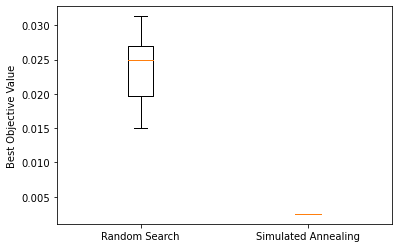

In [104]:
plt.boxplot([RS_output,SA_output])
plt.xticks([1,2],["Random Search", "Simulated Annealing"])
plt.ylabel("Best Objective Value")